# Historical Temperature Data Analysis

While climatology used to be an esoteric craft out of the limelight, the field finds itself today at the center of public attention. Of course, this is because many people are worried about the phenomenon of global climate change (specifically warming) and its consequences. This analysis is an attempt to discover and communicate the changes in an intuitive way. Specifically, this analysis explores whether the underlying distributions of temperature are undergoing regime change, or whether the parameters are simply being shifted.

## Data Origin

The dataset is from [Kaggle](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data), and contains measurements of surface temperature at many different points on the Earth. The data is collected monthly, and goes back as far as 1750 for most of the listed locations.

## Read in the Data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# There are dates, so we need something to convert them
dateReader = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
# Read in the data (this takes a little while to run)
temps = pd.read_csv("data/GlobalLandTemperaturesByCity.csv", parse_dates=['dt'], date_parser=dateReader)

In [14]:
titlesize=20

## Preprocessing

The data contains NaN values for temperature readings, mostly in the earlier measurements. My
assumption is that these are simply skipped measurements, and I chose to drop them.

In [15]:
# Drop NAs
temps = temps.dropna(how="any")

## Subsetting

In order to make sure I am weighing comparable quantities, I isolated the data to one particular city. I chose Springfield, MO because it is the city with the most observations in the dataset. I created a variety of different filters and subsets of the data - ultimately, I ended up using data for the first quarter of each year - restricting the data to a single month of the year loses more data than is necessary, but keeping data from the entire year makes it hard to see the change over time - the variability within a year is much higher than across years.


In [16]:
import warnings
warnings.filterwarnings('ignore')

# Pull out the data for a specific location
# In this case, Springfield MO - the place with the most observations in the dataset
# Add year field, used for plotting over time

springfield_temps = temps[temps.City == "Springfield"]
springfield_temps['year'] = springfield_temps['dt'].map(lambda x: x.year)

# Create boolean masks for different subsets we want to test out.
first_three_months_mask = springfield_temps['dt'].map(lambda x: x.month) <= 3
pre_1900_mask = springfield_temps['dt'].map(lambda x: x.year) < 1900
after_1900_mask = springfield_temps['dt'].map(lambda x: x.year) >= 1900

# Combined masks
f3_pre_1900_mask = first_three_months_mask & pre_1900_mask
f3_post_1900_mask = first_three_months_mask & after_1900_mask

# Subset data based on masks
springfield_q1_temps = springfield_temps[first_three_months_mask]
springfield_f3_pre_1900_temps = springfield_temps[f3_pre_1900_mask]
springfield_f3_post_1900_temps = springfield_temps[f3_post_1900_mask]

## Scatter Plots
My first attempt to see the pattern was with simple scatter plots, plotting `AverageTemperature` versus `year` - this creates a scatter plot that seems as though it _could_ have a slight positive corellation, but it’s _far_ from conclusive - there is simply too much data and not clear enough of a trend to make any statement.

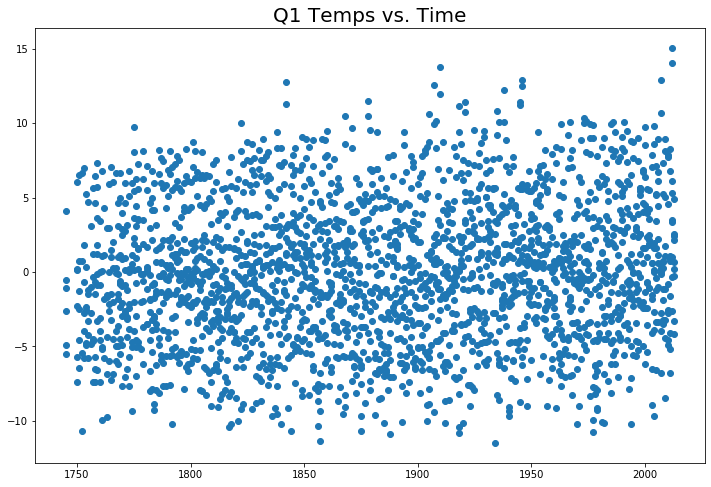

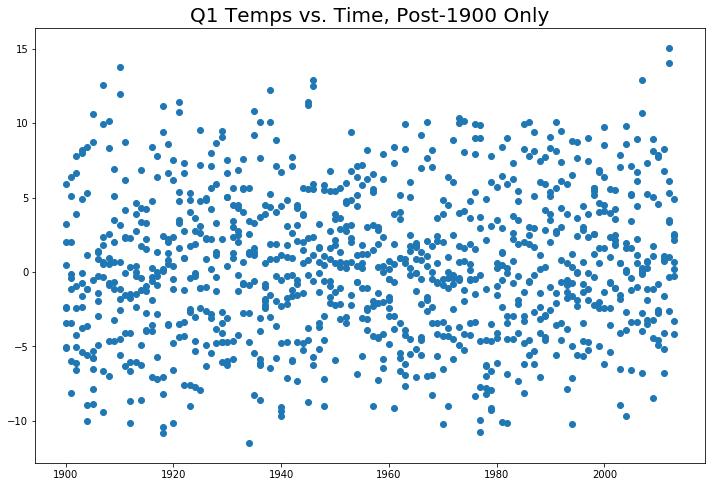

In [17]:
# Scatter over time of Q1 Temps
plt.figure(figsize=(12,8))
plt.scatter(springfield_q1_temps['year'], springfield_q1_temps['AverageTemperature'])
plt.title("Q1 Temps vs. Time", size=titlesize)
plt.show()

# Same plot with post-1900
plt.figure(figsize=(12,8))
plt.scatter(springfield_f3_post_1900_temps['year'], springfield_f3_post_1900_temps['AverageTemperature'])
plt.title("Q1 Temps vs. Time, Post-1900 Only", size=titlesize)
plt.show()

## Examining Distributions

Let's try again with a double histogram, splitting the data at 1900 - shortly after the beginning of widespread use of coal-based electricity generation, and about halfway through the dataset’s timeframe. Using this method, we can see something interesting - the distribution definitely seems to be shifted to the right (higher temperature). This means that higher temperatures during the first quarter have been more frequent since 1900, but it also shows that the underlying distribution's _shape_ hasn’t changed much. This is an important insight, as it means that historically developed models based on these distributions are more likely to be viable, as opposed to if the distribution was wildly changing.

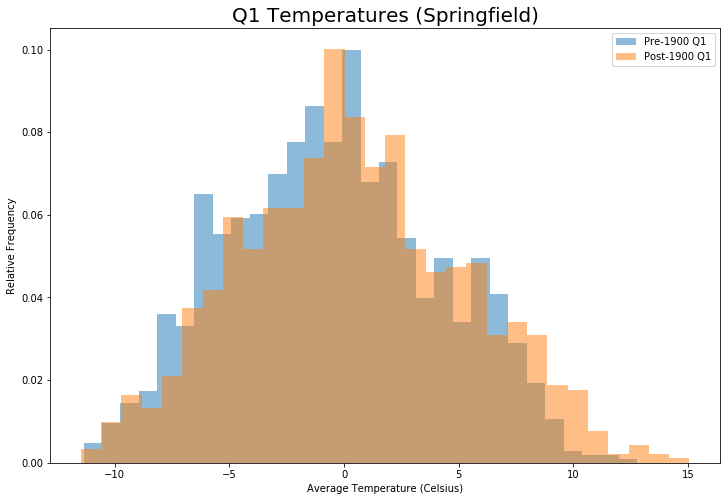

In [19]:
# Double histogram, pre and post 1900 with first 3 months
plt.figure(figsize=(12,8))
plt.hist(springfield_f3_pre_1900_temps['AverageTemperature'], 30, alpha=0.5, density=True, label='Pre-1900 Q1')
plt.hist(springfield_f3_post_1900_temps['AverageTemperature'], 30, alpha=0.5, density=True, label='Post-1900 Q1')
plt.title("Q1 Temperatures (Springfield)", size=titlesize)
plt.ylabel("Relative Frequency")
plt.xlabel("Average Temperature (Celsius)")
plt.legend(loc='upper right')
plt.show()


## Comparison Across Latitude

During this process, I became curious whether latitude affected this shift - it would be interesting to know if there were specific locations on the Earth that could be expected to feel the affects of climate change more severely, as it would mean that aid mechanisms could be allocated more efficiently. I constructed the same visualization as before, this time with St. Petersburg, Russia - a city much farther north than Springfield. Interestingly, the distribution is bimodal, but the same right shift remains. This is more evidence that the underlying distributions remain unchanged, at least for now - across both types of temperature distribution, the distinction between before and after 1900 appears to be a simple right shift.

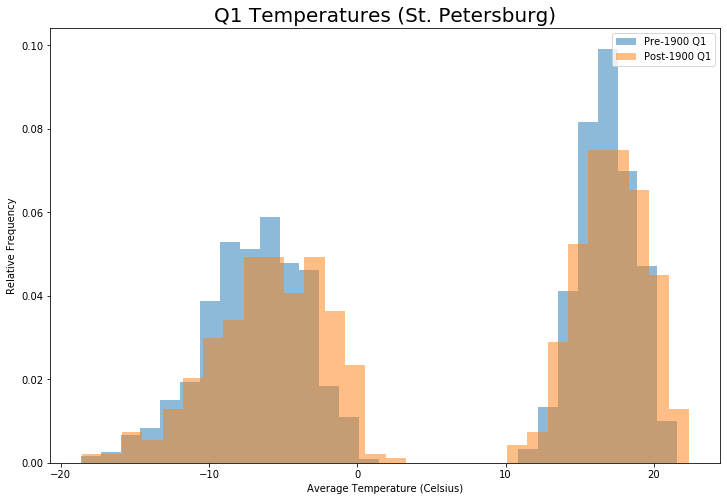

In [21]:
# Construct same double hist as before, this time St. Petersburg
plt.figure(figsize=(12,8))
stp_temps = temps[temps.City == "Saint Petersburg"]
stp_q1_mask = stp_temps['dt'].map(lambda x: x.month) <= 3
stp_pre_1900_mask = stp_temps['dt'].map(lambda x: x.year) < 1900
stp_post_1900_mask = stp_temps['dt'].map(lambda x: x.year) >= 1900
stp_q1_pre_1900_mask = stp_q1_mask & stp_pre_1900_mask
stp_q1_post_1900_mask = stp_q1_mask & stp_post_1900_mask
stp_q1_pre_1900 = stp_temps[stp_q1_pre_1900_mask]
stp_q1_post_1900 = stp_temps[stp_q1_post_1900_mask]
plt.hist(stp_q1_pre_1900['AverageTemperature'], 30, alpha=0.5, density=True, label='Pre-1900 Q1')
plt.hist(stp_q1_post_1900['AverageTemperature'], 30, alpha=0.5, density=True, label='Post-1900 Q1')
plt.legend(loc='upper right')
plt.ylabel("Relative Frequency")
plt.xlabel("Average Temperature (Celsius)")
plt.title("Q1 Temperatures (St. Petersburg)", size=titlesize)
plt.show()

## Conclusion

Across latitudes and between two distribution types, it appears that the process of climate change has been roughly the same - a simple right shift. Because of this, I believe that historical models based on these distributions are likely to be viable. This is good news and bad news - scientists tell a fairly grim story about the current trajectory of climate change, and if their models are viable, the world isn’t exactly in for a treat. On the other hand, understanding the mechanisms of climate change is a good first step to any preventative or restorative action that would be taken.